**Install python dependencies**

In [1]:
!pip install -q -r ./dependencies/requirements.txt

**Load python libraries**

In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

**Load Data**

In [6]:
df = pd.read_csv('./data/data_final_score_all_events.csv')

df2 = pd.read_csv('./data/data_important.csv')[['name', 'matchday', 'event_type', 'occurences']]

# load event_types
event_types = ['pass', 'unsuccessfulPass', 'superPass', 'throwIn', 'goalAssist', 'farCorner', 'cross', 'freeKick', 'interception', 'goalMissedFar', 'shotAtGoal', 'unsuccessfulPenalty', 'missedChance', 'goal', 'doublePack', 'hattrick', 'penaltyGoal', 'ownGoal', 'foul','awardedPenalty', 'causedPenalty', 'yellowCard', 'secondYellowCard', 'redCard', 'successfulTackle', 'unsuccessfulTackle', 'blockedGoalShot', 'offside', 'error', 'savedPenalty', 'lostPenalty', 'defended', 'goalAgainst']
points_catalogue = [['pass', 2], ['unsuccessfulPass', -2], ['superPass', 12], ['throwIn', 2], ['goalAssist', 100], ['farCorner', 12], ['cross', 18], ['freeKick', 12], ['interception', 15], ['goalMissedFar', -20], ['shotAtGoal', 50], ['unsuccessfulPenalty', -60], ['missedChance', -40], ['goal', 200], ['doublePack', 50], ['hattrick', 100], ['penaltyGoal', 120], ['ownGoal', -60], ['foul', -15], ['awardedPenalty', 60], ['causedPenalty', -40], ['yellowCard', -30], ['secondYellowCard', -60], ['redCard', -80], ['successfulTackle', 15], ['unsuccessfulTackle', -10], ['blockedGoalShot', 20], ['offside', -15], ['error', -40], ['savedPenalty', 200], ['lostPenalty', -20], ['defended', 40], ['goalAgainst', -25]]

# event_types = ['successfulTackle', 'pass', 'interception', 'unsuccessfulTackle', 'shotAtGoal', 'superPass', 'unsuccessfulPass', 'foul']
# points_catalogue = [['pass', 2], ['unsuccessfulPass', -2], ['superPass', 12], ['interception', 15], ['shotAtGoal', 50], ['successfulTackle', 15], ['unsuccessfulTackle', -10], ['foul', -15]]

**Calculate final scores**

In [ ]:
df_final_scores = pd.DataFrame(columns=['name', 'position', 'club_name', 'matchday', 'is_home', 'odds_win', 'odds_draw', 'odds_lose', 'final_score'])

for player_name, df_player in tqdm(df.groupby("name")):
    for matchday, df_matchday in df_player.groupby("matchday"):

        points_dict = {
            'name': player_name, 
            'position': df_matchday['position'].max(),
            'club_name': df_matchday['team_name'].max(),
            'matchday': matchday,
            'is_home': df_matchday['is_home'].max(),
            'odds_win': df_matchday['odds_win'].max(),
            'odds_draw': df_matchday['odds_draw'].max(),
            'odds_lose': df_matchday['odds_lose'].max()
        }

        final_score = 0

        for event_type, event_points in points_catalogue:
            value = df_matchday.loc[df_matchday['event_type'] == event_type]['occurences'].values[0]
            event_result = value * event_points
            # points_dict[event_type] = int(event_result)

            final_score = final_score + event_result

        points_dict['final_score'] = final_score

        if df_matchday['occurences'].sum() != 0:
            df_final_scores = df_final_scores.append(points_dict, ignore_index=True)

df_final_scores

**Process Data**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

df_final_scores["is_home"] = df_final_scores["is_home"].astype(bool)
df_final_scores["matchday"] = df_final_scores["matchday"].astype(int)
df_final_scores["final_score"] = df_final_scores["final_score"].astype(int)

# df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_final_scores[['final_score', 'odds_win', "odds_draw", "odds_lose"]]), columns=['final_score', 'odds_win', "odds_draw", "odds_lose"])

# df_scaled

df_final_scores

**Autocorrelation**

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.56582814, 0.5679869 , 0.58091242, 0.59148317, 0.59758999,
        0.61103864, 0.63034289, 0.65564329, 0.68506906, 0.72705165,
        1.        , 0.72705165, 0.68506906, 0.65564329, 0.63034289,
        0.61103864, 0.59758999, 0.59148317, 0.58091242, 0.5679869 ,
        0.56582814]),
 <matplotlib.lines.Line2D at 0x7fbb8b54bb50>)

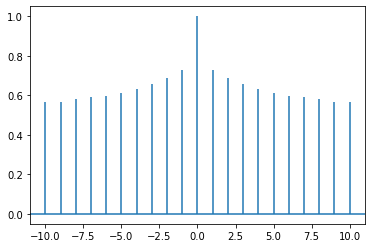

In [8]:
plt.acorr(df2['occurences'])

**Correlation matrix for difference hierachies**

In [9]:
df_fcb = df_final_scores.loc[df_final_scores['club_name'] == 'Bayern Munich']

sums = df_fcb.groupby("matchday")['final_score'].sum()
odds = df_fcb.groupby("matchday")[['odds_win', 'odds_draw', 'odds_lose']].mean()

df_fcb_m = pd.merge(sums, odds, left_index=True, right_index=True)

df_fcb_m_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_fcb_m), columns=df_fcb_m.columns)

df_fcb_m_scaled[['final_score', 'odds_lose']].plot.line()

plt.figure(figsize=(12,10))
sns.heatmap(df_fcb_m_scaled.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()


NameError: name 'df_final_scores' is not defined

In [ ]:
sums = df_final_scores.groupby(["club_name", "matchday"])['final_score'].sum()
odds = df_final_scores.groupby(["club_name", "matchday"])[['odds_win', 'odds_draw', 'odds_lose']].mean()

df_fs = pd.merge(sums, odds, left_index=True, right_index=True)

df_fs_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_fs), columns=df_fs.columns)

plt.figure(figsize=(12,10))
sns.heatmap(df_fs_scaled.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df_rl9 = df_final_scores.loc[df_final_scores['name'] == 'Robert Lewandowski']

df_rl9.set_index('matchday', inplace=True)

df_rl9_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_rl9[['final_score', 'odds_win', "odds_draw", "odds_lose"]]), columns=['final_score', 'odds_win', "odds_draw", "odds_lose"])

# df_rl9_scaled[['final_score', 'odds_lose']].plot.line()

plt.figure(figsize=(12,10))
sns.heatmap(df_rl9_scaled.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

**Calculate % from event score to final score**

In [ ]:
for event_type in tqdm(event_types):
    for index, row in df_final_scores.iterrows():
            df_final_scores.loc[index, event_type + '_in_%'] = round(row[event_type] / row['final_score'] if row['final_score'] else 0, 3)

**Reduce data to player above average 50 points per matchday**

In [ ]:
df_total_scores = df_final_scores.groupby('name')['final_score'].sum()

series_total_1700 = df_total_scores.loc[df_total_scores > 34 * 50]

names_over_1700 = series_total_1700.index.tolist()

series_total_1700.to_csv('./data/names_1700.csv')


**Reduce data to events above average % of final_score**

In [ ]:
df_percent = df_total_1700.loc[:, df_total_1700.columns.str.endswith('_in_%')]

df_percent.sum().abs().sort_values(ascending=False)

df_over_5_percent = df_percent.mean().abs().loc[df_percent.mean().abs() >  0.05]

over_5_percent_list = df_over_5_percent.sort_values(ascending=False).index.tolist()